In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Numa partida de ténis, muitas vezes a bola é batida de modo a adquirir rotação, num eixo horizontal e
# perpendicular à velocidade. Calcule a trajetória da bola, quando parte da posição inicial (-10,1,0) com a
# velocidade 130 km/h, a fazer um ângulo de 10º com a horizontal e no sentido positivo dum eixo horizontal OX.
# A bola de ténis tem a massa 57 g, o diâmetro 67 mm e no ar tem a velocidade terminal 100 km/h.
# altura máxima e o alcance (quando bate em y = 0 da trajetoria da bola

# Valores dados
g = 9.8
m = 0.057
# Nota: O valor dado é o do diâmetro mas as fórmulas utilizam o raio,
# logo precisamos de dividir o valor por 2 para obter o raio.
r = 0.067 / 2
p_ar = 1.225
# Convert angle from degrees to radians
angle = 10 / 180 * np.pi
# Converter as velocidades de km/h para m/s
vT = 100 * (1000/3600)
v0Norm = 130 * (1000/3600)

# Valores calculados
A = np.pi * r**2
D = g / vT**2
# Cálculo dos componentes da velocidade, o ângulo de 10° é com o eixo OX positivo na
# horizontal e como OY é o eixo vertical, isto quer dizer que a velocidade em z é nula.
v0x = np.cos(angle) * v0Norm
v0y = np.sin(angle) * v0Norm

# Parâmetros
dt = 0.001
t0 = 0
tf = 2
x0 = np.array([-10, 1, 0])
v0 = np.array([v0x, v0y, 0])

# Esta função calcula a aceleração a partir da rotação da bola e da velocidade atual
def accel(w, v):
    vNorm = np.linalg.norm(v)
    # Cálculo da aceleração da resistência do ar
    aXRes = -D * vNorm * v[0]
    aYRes = -D * vNorm * v[1]
    aZRes = -D * vNorm * v[2]
    
    # Cálculo da força de Magnus, np.cross calcula o produto
    # vetorial de dois vetores.
    F_magnus = 1/2 * A * p_ar * r * np.cross(w, v)
    # Finalmente a aceleração é a soma da aceleração gravítica
    # e a soma da aceleração da força de Magnus
    return np.array([aXRes, -g + aYRes, aZRes]) + F_magnus/m

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# Agora lidamos com movimento tridimensional, logo precisamos de mais um
# elemento para os vetores das quantidades.
shape = (n + 1, 3)



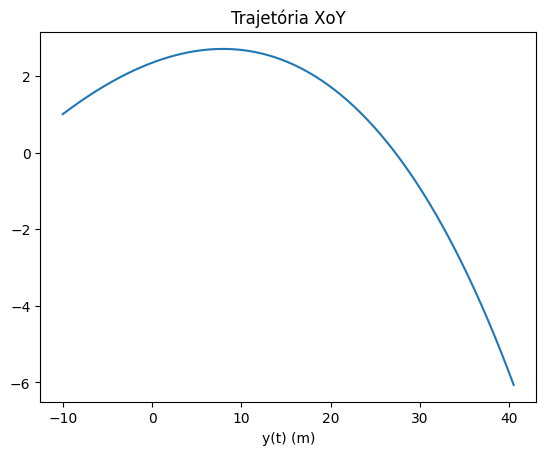

In [4]:
# a rotação é nula

# Rotação nula
w = np.array([0, 0, 0])

t = np.zeros(n + 1)
x = np.zeros(shape)
v = np.zeros(shape)
a = np.zeros(shape)

# Insert initial values
a[0] = accel(w, v0)
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
    a[i + 1] = accel(w, v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt
plt.plot(x[:, 0], x[:, 1])
plt.xlabel("x(t) (m)")
plt.xlabel("y(t) (m)")
plt.title("Trajetória XoY")
plt.show()

# np.argmax devolve o indíce do máximo no array altura
idx = x[:, 1].argmax()
yMax = x[idx, 1]
tMax = t[idx]

# alcance maximo e respetivo tempo
for i in range(n):
    if x[i, 1] * x[i + 1, 1] < 0:
        idx = i
        break

xRange = x[idx, 0]
tRange = t[idx]

In [ ]:
# b) A rotação é descrita por (0,0,100) rad/s

w = np.array([0, 0, 100])

tRotPos = np.zeros(n + 1)
xRotPos = np.zeros(shape)
vRotPos = np.zeros(shape)
aRotPos = np.zeros(shape)

# Insert initial values
aRotPos[0] = accel(w, v0)
vRotPos[0] = v0
tRotPos[0] = t0
xRotPos[0] = x0

for i in range(n):
    aRotPos[i + 1] = accel(w, vRotPos[i])
    vRotPos[i + 1] = vRotPos[i] + aRotPos[i] * dt
    xRotPos[i + 1] = xRotPos[i] + vRotPos[i] * dt
    tRotPos[i + 1] = tRotPos[i] + dt
plt.plot(xRotPos[:, 0], xRotPos[:, 1])
plt.xlabel("x(t) (m)")
plt.xlabel("y(t) (m)")
plt.title("Trajetória XoY")
plt.show()

# altura maxima e respetivo tempo
idx = xRotPos[:, 1].argmax()
yRotPosMax = xRotPos[idx, 1]
tRotPosMax = tRotPos[idx]

# alcance maximo e respetivo tempo

for i in range(n):
    if xRotPos[i, 1] * xRotPos[i + 1, 1] < 0:
        idx = i
        break

xRotPosRange = xRotPos[idx, 0]
tRotPosRange = tRotPos[idx]

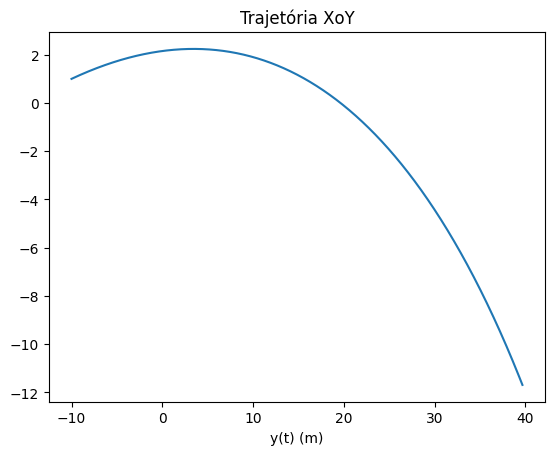

In [5]:
# A rotação é descrita por (0,0,-100) rad/s

w = np.array([0, 0, -100])

tRotNeg = np.zeros(n + 1)
xRotNeg = np.zeros(shape)
vRotNeg = np.zeros(shape)
aRotNeg = np.zeros(shape)

# Insert initial values
aRotNeg[0] = accel(w, v0)
vRotNeg[0] = v0
tRotNeg[0] = t0
xRotNeg[0] = x0

for i in range(n):
    aRotNeg[i + 1] = accel(w, vRotNeg[i])
    vRotNeg[i + 1] = vRotNeg[i] + aRotNeg[i] * dt
    xRotNeg[i + 1] = xRotNeg[i] + vRotNeg[i] * dt
    tRotNeg[i + 1] = tRotNeg[i] + dt
plt.plot(xRotNeg[:, 0], xRotNeg[:, 1])
plt.xlabel("x(t) (m)")
plt.xlabel("y(t) (m)")
plt.title("Trajetória XoY")
plt.show()


idx = xRotNeg[:, 1].argmax()
yRotNegMax = xRotNeg[idx, 1]
tRotNegMax = tRotNeg[idx]

for i in range(n):
    if xRotNeg[i, 1] * xRotNeg[i + 1, 1] < 0:
        idx = i
        break

xRotNegRange = xRotNeg[idx, 0]
tRotNegRange = tRotNeg[idx]